# Hydrogen wavefunctions

None of the material in this notebook is required knowledge for PHAS0004. These are topics you will come back to in next year's quantum physics course.

The normalised radial wavefunction is:
$$ R_{nl}(r)=\sqrt{\left(\frac{2}{n a_0}\right)^3 \frac{(n-l-1)!}{2n(n+l)!}} \exp\left(\frac{-r}{n a_0}\right) \left(\frac{2r}{n a_0}\right)^l L^{2l+1}_{n-l-1} \left(\frac{2r}{n a_0}\right) $$
where $a_0$ is the Bohr radius and $L^{2l+1}_{n-l-1}\left(\frac{2r}{n a_0}\right)$ are the associated Laguerre polynomials.

To get from this (normalised) version of the hydrogen wavefunction to the probability distribtuion, we have to remember that this is a sphere so the appropriate element is $r^2 dr$, such that 
$$\rho_{nl}(r) = \left| R_{nl}(r) \right|^2 $$ 
is used as
$$ \text{Prob}(r_0 \leq r \leq r_1) = \int_{r_0}^{r_1} r^2 \rho_{nl}(r) dr $$

In [1]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import numpy as np  #import the numpy library as np
import matplotlib.pyplot as plt #import the pyplot library as plt
import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense
from matplotlib import cm, colors
import math  #Import math so that math.pi can be used
import scipy.constants #Import scipy.constants so that hbar and electron_mass can be used
from scipy.optimize import fsolve # Import fsolve for the numerical solving
from scipy import integrate # Import integrate for numerical integration
from scipy.special import genlaguerre #Import the general Lagueere polynomial
from scipy.special import lpmv #Import the general Lagueere polynomial
from scipy.special import sph_harm #Import the general Lagueere polynomial

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False #Turn off the box around the legend
mpl.rcParams['figure.dpi']=150 # dots per inch

In [2]:
#Here we define the normalised radial hydrogen wavefunction as per the equation above
def radialHydrogenPsi(r,n,l):
    partA=(2.0/n)**3
    partB=math.factorial(n-l-1)/(2*n*math.factorial(n+l))
    sqrtPart=np.sqrt(partA*partB)
    expPart=np.exp(-r/n)
    partC=(2*r/n)**l
    partD=scipy.special.genlaguerre(n-l-1,2*l+1)(2.*r/n)  
    #special.genlaguerre(n-l-1,2*l+1) is a function to which we pass the argument (2.r/n)
    return sqrtPart*expPart*partC*partD

def radialHydrogenrSqRho(r,n,l):
    return (r**2)*(radialHydrogenPsi(r,n,l)**2)  


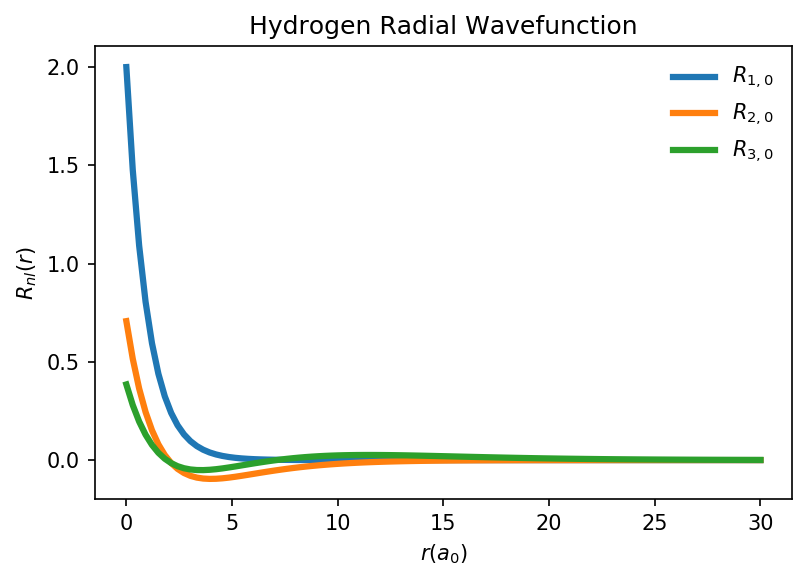

In [9]:
#Now let's plot our wavefunction
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
r=np.linspace(0,30,100)
ax.plot(r,radialHydrogenPsi(r,1,0),linewidth=3,label=r"$R_{1,0}$") #Plot x vs sin (pi x)
ax.plot(r,radialHydrogenPsi(r,2,0),linewidth=3,label=r"$R_{2,0}$") #Plot x vs sin (pi x)
ax.plot(r,radialHydrogenPsi(r,3,0),linewidth=3,label=r"$R_{3,0}$") #Plot x vs sin (pi x)
ax.set_title(r"Hydrogen Radial Wavefunction")  #Set the title
ax.set_xlabel("$r (a_0)$") # Set the x-axis label
ax.set_ylabel("$R_{nl}(r)$") # Set the y-axis label
ax.legend() #Add the legend (which is auto generated using the labels)
#ax.grid() # Draw a grid

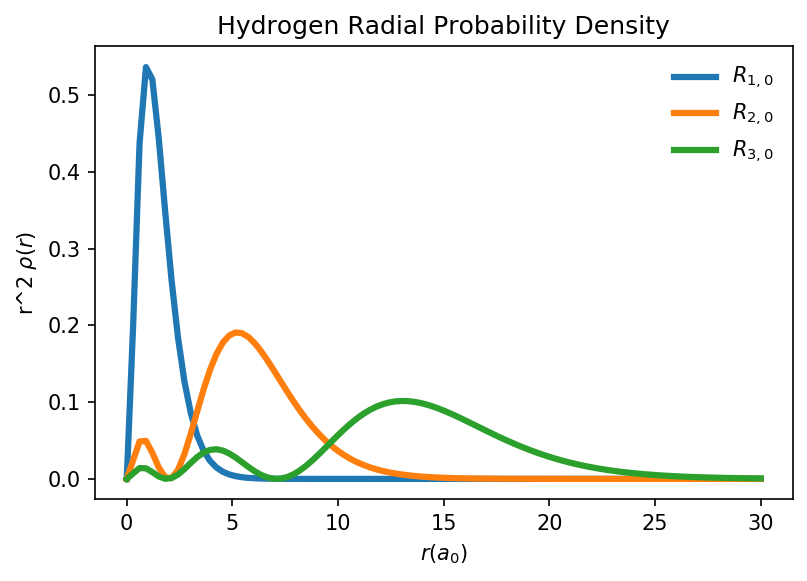

In [8]:
#Now let's plot our probability density function
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
r=np.linspace(0,30,100)
ax.plot(r,radialHydrogenrSqRho(r,1,0),linewidth=3,label=r"$R_{1,0}$") #Plot radialHygrogenRho vs r
ax.plot(r,radialHydrogenrSqRho(r,2,0),linewidth=3,label=r"$R_{2,0}$") #Plot radialHygrogenRho vs r
ax.plot(r,radialHydrogenrSqRho(r,3,0),linewidth=3,label=r"$R_{3,0}$") #Plot radialHygrogenRho vs r
ax.set_title("Hydrogen Radial Probability Density")  #Set the title
ax.set_xlabel(r"$r (a_0)$") # Set the x-axis label
ax.set_ylabel(r"r^2 $\rho(r)$") # Set the y-axis labe
ax.legend() #Add the legend
#ax.grid() # Draw a grid

## Angular Wavefunction

The normalised angular wavefunction is defined by two functions
$$ f_{lm}(\theta) = (-1)^m \sqrt{\frac{(2l+1)(l-m)!}{4 \pi (l+m)!}} P_{lm}\left(\cos\theta\right) $$
and 
$$ g_m(\phi) = e^{im\phi} $$
where $P_{lm}\left(\cos\theta\right)$ are the associtaed Legendre polynomials (which you will get to enjoy in the year two quantum physics course).

For now we will just plot the total probability density of the hydrogen atom
$$ \rho_{nlm}(r,\theta,\phi) = \left| R_{nl}(r) f_{lm}(\theta) g_m(\phi) \right|^2 $$


In [5]:
#Define the angular hydrogen probability density as the modulus square of the above 
def angularHydrogenRho(theta,phi,l,m):
    partA=(2*l+1)*math.factorial(l-m)/(4*math.pi*math.factorial(l+m))
    return partA*(lpmv(m,l,np.cos(theta))**2)

#The total probability density is just the radial times the angular
def totalHydrogenRho(r,theta,phi,n,l,m):
    return radialHydrogenrSqRho(r,n,l)*angularHydrogenRho(theta,phi,l,m)

## Plotting slices

The wavefunctions and probability densities are manifestly three dimensional. Our screens are two-dimensional. Although three-dimensional representations of the probability distributions exist (see Wikipedia). We will just plot two-dimnesional slices here.

In [6]:
#Definte the range (in terms of number of Bohr radius's [radii])
plotMax=30  #Plot range
plotPoints=300 #Number of points along each axis
x=np.linspace(-plotMax,plotMax,plotPoints) #plotPoints x values from -plotMax to plotMax
y=np.linspace(-plotMax,plotMax,plotPoints) #plotPoints y values from -plotMax to plotMax
X,Y=np.meshgrid(x,y) #Turns two 1D arrays into two 2D arrays giving the coordinates of each cell in the plotPoints*plotPoints grid
#print(X)
#Now work out the spherical coordinates for these cartesian coordinates at z=0
z=0
r=np.sqrt(X**2+Y**2+z**2)
phi=np.arctan2(Y,X) #arctan2 is a function which handles the sign of theta
theta=np.arctan2(np.sqrt(X**2+Y**2),z) 

Text(0.5, 1.0, 'Hydrogen Probability Density for n=4, l=1, m=-1')

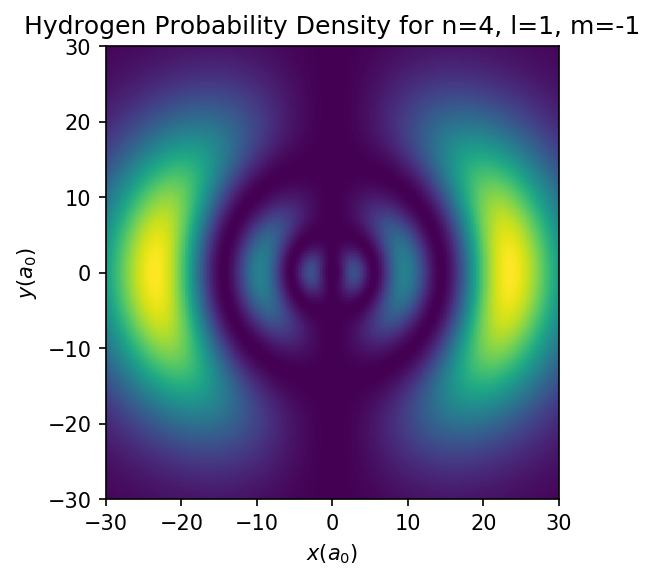

In [7]:
#Now let's plot our probability density function
n=4  #Pick your n value... too big and you'll need to change plotMax above
l=1 # Pick your l value remembering 0<= l <= n-1
m=-1# Pick your m value remembereing -l <= m <= l
fig, ax = plt.subplots()  #I like to make plots using this silly fig,ax method but plot how you like
ax.imshow(totalHydrogenRho(r,phi,theta,n,l,m).T,extent=[-plotMax,plotMax,-plotMax,plotMax],interpolation="none",origin="lower")
ax.set_xlabel(r"$x (a_0)$")
ax.set_ylabel(r"$y (a_0)$")
ax.set_title("Hydrogen Probability Density for n="+str(n)+", l="+str(l)+", m="+str(m))

Those of you interested in computational physics might like to work out how to create a 3D version of the probability density plot. 